In [27]:

from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd 
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.manifold import MDS
exec(compile(open(r"../nsimplices.py", encoding="utf8").read(), "nsimplices.py", 'exec'))

In [28]:
df_gene = pd.read_csv("~/nSimplices/data/sce_full_Darmanis_scScope.csv", index_col=0, header=0)
# df_gene = pd.read_csv("~/nSimplices/data/sce_full_sce_Baron_scScope.csv", index_col=0, header=0)

In [29]:

### Run nSimplices method
feature_num = df_gene.shape[1]
dim_start = 2
dim_end = 2
out_dis = pdist(df_gene)
out_dis_sq = squareform(out_dis)
num_point = df_gene.shape[0]

outlier_indices, subspace_dim, corr_dis_sq, corr_coord = nsimplices(out_dis_sq, feature_num, dim_start, dim_end, euc_coord=np.array(df_gene.copy()))

dim in find_subspace_dim is: 2
med_height is: [20414.09755605]
subspace_dim is: 2
thres is: 38770.5663004621 mean is: 23835.329678941573 std is: 4978.412207173509
outlier indices are: [ 90  91  94 102 103 108 114 145 148 160 200 205 206 208 209 214 217 220
 226 231 239 245 249 250 251 252 284 295 297 321 323 325 329 330 332 339
 353 355 397 401 404 407 411 413]
idx is: 90 height is: 40141.23525118166 thres is: 38770.5663004621
idx is: 91 height is: 43400.38562647667 thres is: 38770.5663004621
idx is: 94 height is: 55516.5950350355 thres is: 38770.5663004621
idx is: 102 height is: 42699.393873860354 thres is: 38770.5663004621
idx is: 103 height is: 42841.24651963591 thres is: 38770.5663004621
idx is: 108 height is: 40282.45081275693 thres is: 38770.5663004621
idx is: 114 height is: 46899.308119386056 thres is: 38770.5663004621
idx is: 145 height is: 41652.36594490554 thres is: 38770.5663004621
idx is: 148 height is: 45751.091897910985 thres is: 38770.5663004621
idx is: 160 height is: 43

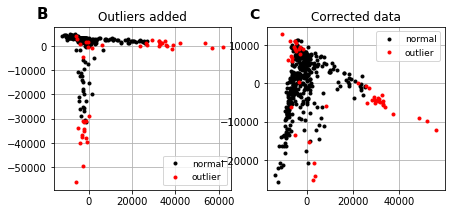

In [30]:
normal_indices=[i for i in range(num_point) if i not in outlier_indices] # list of normal points 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3))

# # plot original graph
# va, ve, Xe = cMDS(ori_dis_sq)
# ax1.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='black', label="normal")
# ax1.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red', label="selected")
# ax1.set_title("True data")
# ax1.text(-0.1, 1.05, 'A', transform=ax1.transAxes, 
#         size=15, weight='bold')

# ax1.legend(fontsize=9)
# ax1.grid()

# plot original graphs with outliers added 
va, ve, Xe = cMDS(out_dis_sq)
ax1.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='black', label="normal")
ax1.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red', label="outlier")
ax1.legend(fontsize=9)
ax1.grid()
ax1.set_title("Outliers added")
ax1.text(-0.1, 1.05, 'B', transform=ax1.transAxes, 
        size=15, weight='bold')

# plot correct outliers 
va, ve, Xe = cMDS(corr_dis_sq)   
ax2.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='black', label="normal")
ax2.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red', label="outlier")
ax2.legend(fontsize=9)
ax2.set_title("Corrected data")
ax2.text(-0.1, 1.05, 'C', transform=ax2.transAxes, 
        size=14, weight='bold')
ax2.grid()
# plt.savefig(cross_fig_path)
plt.show()
plt.close()

In [31]:
import plotly.express as px

normal_indices=[i for i in range(num_point) if i not in outlier_indices] # list of normal points 

# # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3))
# ax1 = plt.axes(projection='3d')
# ax2 = plt.axes(projection='3d')

# fig = plt.figure()
# ax1 = fig.add_subplot(1, 2, 1, projection='3d')
outlier_vector = np.zeros(Xe.shape[0])
outlier_vector[outlier_indices] = 1

df = pd.DataFrame({'x': Xe[:, 0], 'y': Xe[:, 1], 'z': Xe[:, 2], 'outlier': outlier_vector})

# plot original graphs with outliers added 
va, ve, Xe = cMDS(out_dis_sq)
df = pd.DataFrame({'x': Xe[:, 0], 'y': Xe[:, 1], 'z': Xe[:, 2], 'outlier': outlier_vector})

# ax1.plot3D(Xe[normal_indices,0],Xe[normal_indices,1], Xe[normal_indices,2], '.', color='black', label="normal")
# ax1.plot3D(Xe[outlier_indices,0],Xe[outlier_indices,1], Xe[outlier_indices,2], '.',color='red', label="outlier")
# ax1.legend(fontsize=9)
# ax1.grid()
# ax1.set_title("Outliers added")
# ax1.text(-0.1, 1.05, 'B', transform=ax1.transAxes, 
#         size=15, weight='bold')
fig = px.scatter_3d(df, x='x', y='y', z='z', color='outlier',
                 width=700, height=500,
                 title="3D Scatter Plot")
fig.update_traces(marker_size = 3)

fig.show()
# plt.show()

# plot correct outliers 
va, ve, Xe = cMDS(corr_dis_sq)   
df = pd.DataFrame({'x': Xe[:, 0], 'y': Xe[:, 1], 'z': Xe[:, 2], 'outlier': outlier_vector})

# ax2.plot3D(Xe[normal_indices,0],Xe[normal_indices,1], Xe[normal_indices,2], '.', color='black', label="normal")
# ax2.plot3D(Xe[outlier_indices,0],Xe[outlier_indices,1], Xe[outlier_indices,2], '.',color='red', label="outlier")
# ax2.legend(fontsize=9)
# ax2.set_title("Corrected data")
# ax2.text(-0.1, 1.05, 'C', transform=ax2.transAxes, 
#         size=14, weight='bold')
# ax2.grid()
# plt.savefig(cross_fig_path)
fig = px.scatter_3d(df, x='x', y='y', z='z', color='outlier',
                 width=700, height=500,
                 title="3D Scatter Plot")
fig.update_traces(marker_size = 3)
fig.show()
# plt.show()
# plt.close()

In [32]:
# fig = plt.figure()
# ax2 = fig.add_subplot(1, 2, 1, projection='3d')
# # plot correct outliers 
# va, ve, Xe = cMDS(corr_dis_sq)   
# ax2.plot3D(Xe[normal_indices,0],Xe[normal_indices,1], Xe[normal_indices,2], '.', color='black', label="normal")
# ax2.plot3D(Xe[outlier_indices,0],Xe[outlier_indices,1], Xe[outlier_indices,2], '.',color='red', label="outlier")
# ax2.legend(fontsize=9)
# ax2.set_title("Corrected data")
# # ax2.text(-0.1, 1.05, 'C', transform=ax2.transAxes, 
# #         size=14, weight='bold')
# ax2.grid()
# # plt.savefig(cross_fig_path)
# plt.show()
# # plt.close()